# ME144 - Heat Transfer - Homework 6
### Eric Kuhn
### Due 4/30/21

In [1]:
from Libraries import thermodynamics as thermo
from Libraries import HT_internal_convection as intconv
from Libraries import HT_thermal_resistance as res
from Libraries import HT_natural_convection as natconv

import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as csts

import schemdraw as schem
import schemdraw.elements as e

## Problem 8.42

### The atmospheric air enters a 10 m long, 150 mm diameter uninsulated heating duct at 60$^o$C and 0.04 $\frac{kg}{s}$. The duct surface temperature is approximately constant at $T_s=$ 15$^o$C.
##### (a) What is the outlet air temperature $T_o$, the heat rate, $q$ and the pressure drop $\Delta p$ for these conditions?
##### (b) To illustrate the tradeoff between the heat transfer rate and pressure drop considerations, calculate $q$ and $\Delta p$ for diameters in the range from 0.1 to 0.2 m. In your analysis, maintain the total surface area, $A_s = \pi D L$, at the value computed for part (a). Plot $q$, $\Delta p$, and $L$ as a function of the duct diameter.

In [17]:
#?intconv.PipeFlow
thermo.Fluid

#Variables
L = 10 #m 
D = 150e-3 #m
T_i = 60 #C
T_s = 15 #C
mdot = 0.04 #kg/s

#Thermal Circuit
Rp = []
Rp.append(res.Resistance("$R'_{conv,int}","W/m"))
Rp.append(res.Resistance("$R'_{cond,p}","W/m"))
Rp.append(res.Resistance("$R'_{conv,ext}","W/m"))

#Thermodynamic properties of air at mean film temp T_m
T_m = (T_i+T_s)/2 #C
airprop = thermo.Fluid('air',T_m,"C")

#Declaring duct via PipeFlow
duct = intconv.PipeFlow(D, mdot = 0.04, nu = airprop.nu, rho = airprop.rho)
print("The Reynolds number for the flow is: %.1f" %duct.Re)

#Using the Dittus Boelter relation to solve for Nu 
duct.Dittus_Boelter("cooling", Pr=airprop.Pr, Re = duct.Re)

#Applying Nusselt number to solve for average heat transfer coefficient h
h = (airprop.k/D)*(duct.Nu)
print("The average heat transfer coefficient for the duct is %.2f W/m^2.K" %h)

#T_o = intconv.T_mo_T_infty(T_infty=T_s,T_mi=T_i,P,L=10,mdot,airprop.Cp,R_tot)
T_o = T_s-(T_s-T_i)*np.exp(-1/(mdot*airprop.Cp*R_tot))
#print("The average temperature at the outlet of the duct is %.2f C" %T_o)

The Reynolds number for the flow is: 17845.3
Warning Reynolds number is not defined
The average heat transfer coefficient for the duct is 9.38 W/m^2.K


NameError: name 'R_tot' is not defined

## Problem 9.39
### The thermal conductivity and the surface emissivity of a material may be determined by heating its bottom surface and exposing its top surface to quiescent air and a large surroundings of equivalent temperatures, $T_{\infty} = T_{sur} = 25^o$C. The remaining surfaces of the sample/heater are well insulated.

### Consider a sample of thickness $L =$ 25 mm and a square planform of width $W=$ 250 mm. In an experiment performed under steady-state conditions, temperature measurements made at lower and upper surface of the sample yields values of $T_1 =$ 150$^o$C and $T_2 =$ 100$^o$C, respectively, for a power input of $P_{elec} =$ 70 W. What are the thermal conductivity and emissivity of the sample?

In [14]:
T_sur = T_infty = 25 #C
L = 25e-3 #m
W = 250e-3 #m
T_1 = 150 #C
T_2 = 100 #C
P_elec = 70 #W

A = W**2


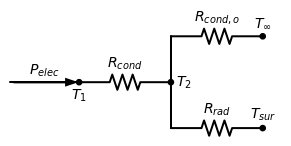

In [4]:
Rp = []
Rp.append(res.Resistance("$R_{cond}$","W/m"))
Rp.append(res.Resistance("$R_{cond,o}$","W/m"))
Rp.append(res.Resistance("$R_{rad}$","W/m"))

d = schem.Drawing()
L1 = d.add(e.LINE, toplabel = "$P_{elec}$", endpts = [[-2.25, 0],[0, 0]])
d.labelI(L1, arrowofst = 0)
d.add(e.DOT, botlabel='$T_1$')
R0 = d.add(e.RES, d='right', label=Rp[0].name)
d.add( e.DOT, rgtlabel='$T_2$')
d.push()
d.add(e.LINE, l = 1.5, d = 'up')
R3 = d.add( e.RES, d='right', label=Rp[1].name )
d.add( e.DOT, label='$T_{\infty}$')
d.pop()
d.add(e.LINE, d='down', l = 1.5)
R4 = d.add( e.RES, d='right', label=Rp[2].name )
d.add( e.DOT, label='$T_{sur}$')
d.draw()

In [7]:
##Properties of ambient air at film temperature
T_m = (T_2+T_infty)/2
airprop = thermo.Fluid('air',T_m,"C")

#Fourier's Law for conduction, solving for conductivity in the slab where P_elec = Q_cond
k = ((P_elec)/(W**2))*(L/(T_1-T_2))
print("The thermal conductivitiy of the material is %.2f W/m.K" %k)

?natconv


The thermal conductivitiy of the material is 0.56 W/m.K


Applying the conservation of energy:

$$
P_{elec} = Q_{conv,0} + Q_{rad}
$$

where

$$
Q_{conv,o} = h_L A (T_2 - T_{infty})
$$

and

$$
Q_{rad} = \sigma \epsilon A (T^4_2 - T^4_{\infty})
$$

resulting in:

$$
P_{elec} = h_L A dT + \sigma \epsilon A (T^4_2 - T^4_{\infty})
$$

Solving for $\epsilon$:

$$
\epsilon = \frac{P_{elec}-hAdT}{\sigma A (T^4_2 - T^4_{\infty})}
$$

In [18]:
Ra_L = natconv.Ra(g=9.81, beta=airprop.beta, DT=(T_2-T_infty), D =(W/4), nu = airprop.nu, alpha = airprop.alpha)

h = (airprop.k*0.54*(Ra_L**(1/4)))/(W/4)

eps = (P_elec - h*A*(T_2-T_infty))/((5.67*10**-8)*A*((thermo.C2K(T_2)**4)-(thermo.C2K(T_infty)**4)))
print("The emissivitity of the slab is %.3f" %eps)

The emissivitity $\epsilon$ of the slab is 0.809
